In [24]:
using LinearAlgebra
using Distributions
using FileIO
import JLD2
using DataFrames

In [25]:
using Revise
using Newtrinos
using Newtrinos.osc

In [26]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

physics = (; osc);

In [27]:
experiments = (

   katrin= Newtrinos.katrin.configure(physics),
);

In [28]:
mass_nu=Newtrinos.osc.get_neutrinomass(osc_cfg.flavour)

(::Newtrinos.osc.var"#NeutrinoMassNND#50"{NNM}) (generic function with 1 method)

In [29]:
par= Newtrinos.get_params(experiments)

(N = 100.0, m₀ = 0.1, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [30]:
mass_nu_value= mass_nu(par)

0.04771368262188095

In [31]:
osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg_SM)

physics_SM = (; osc);

In [32]:
experiments_SM = (

   katrin= Newtrinos.katrin.configure(physics_SM),
);

In [33]:
NeutrinoMass_SM=Newtrinos.osc.get_neutrinomass_SM(osc_cfg_SM.flavour)

(::Newtrinos.osc.var"#NeutrinoMass_SM#103") (generic function with 1 method)

In [34]:
p = Newtrinos.get_params(experiments_SM)

(Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [35]:
mass_nu_value_SM= NeutrinoMass_SM(p)

0.010074612940900002

Calculation of m0 from m_nu measeurement in SM 

In [36]:
m_nu_squared=0.6 # eV^2, from KATRIN measurement

p= Newtrinos.get_params(experiments_SM)
U= Newtrinos.osc.get_PMNS(p)

sumU = 0.0

for i in 1:3
    sumU += abs(U[1,i])^2
end

term1= abs(U[1,2])^2*(p[:Δm²₂₁])
term2= abs(U[1,2])^2*(p[:Δm²₃₁])

m0_squared= (m_nu_squared-term1-term2) / sumU

m0=sqrt(m0_squared)

0.7741016790565695

POSTERIOR STUDY

In [37]:
posterior_sm=Newtrinos.katrin.get_posterior_SM(p)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


50×2 Matrix{Float64}:
 2.53871e-5   0.00503856
 0.0140988    0.0109211
 0.0315684    0.0113866
 0.0499254    0.0118808
 0.0709447    0.0125434
 0.0999254    0.0131359
 0.123252     0.0136959
 0.149925     0.0142474
 0.199925     0.0149883
 0.249925     0.0153765
 0.299925     0.0153416
 0.349925     0.0150424
 0.399925     0.0143377
 ⋮           
 1.34909      4.99986e-5
 1.40941      0.0
 1.44389      0.0
 1.48699      0.0
 1.52148      0.0
 1.55596      0.0
 1.61199      0.0
 1.66803      0.0
 1.73697     -4.99989e-5
 1.7801       0.0
 1.84475      0.0
 1.93099      4.9999e-5

In [38]:
using CairoMakie
using CSV

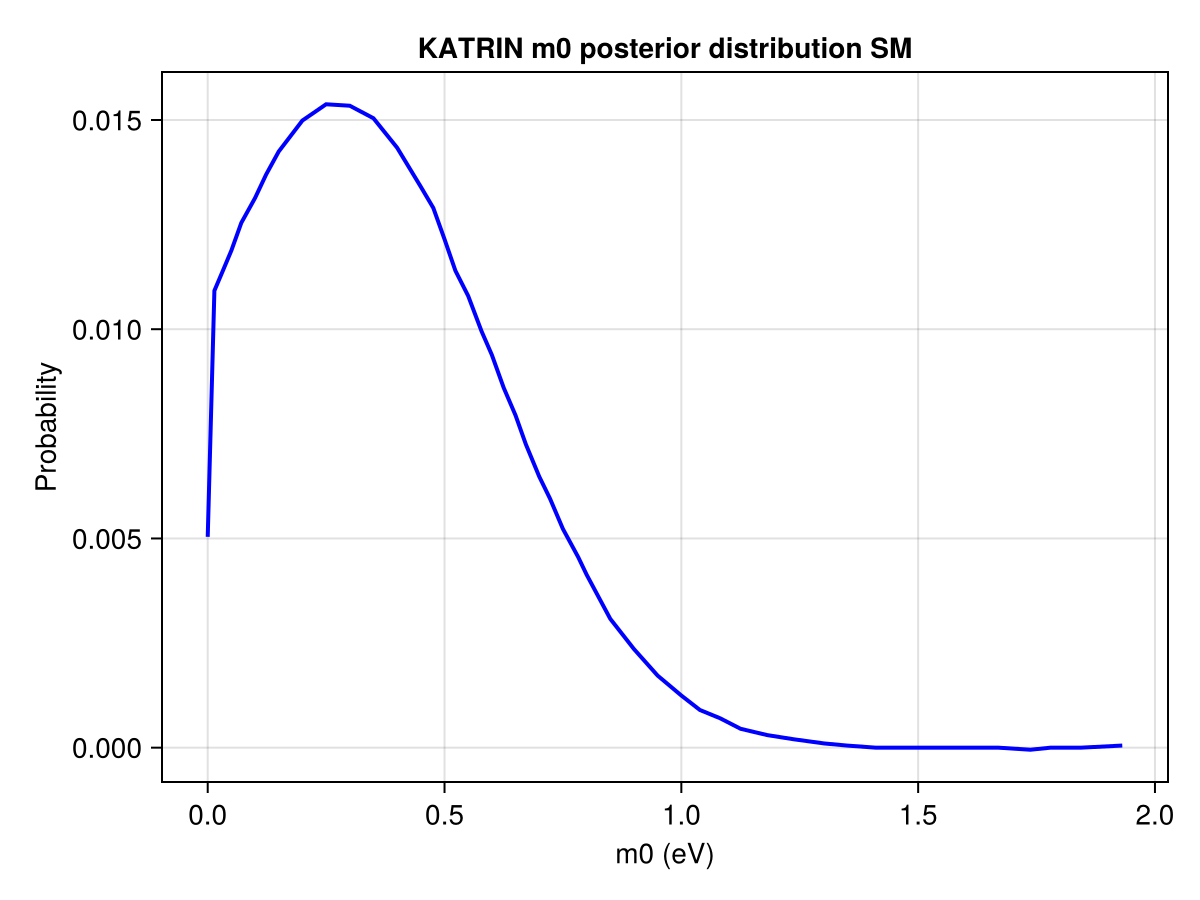

In [39]:
lines(posterior_sm[:, 1], posterior_sm[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution SM"),
      color=:blue,
      linewidth=2)

In [40]:
posterior_data_m_nu=CSV.read("/home/sofialon/Newtrinos.jl/src/experiments/katrin/posterior_m_nu.csv", DataFrame)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


Row,mass probability,Column2
,Float64,Float64
1,0.0001,0.01
2,0.0141734,0.01095
3,0.031643,0.0114
4,0.05,0.0118896
5,0.0710193,0.01255
6,0.1,0.0131408
7,0.123327,0.0137
8,0.15,0.014251
9,0.2,0.0149911


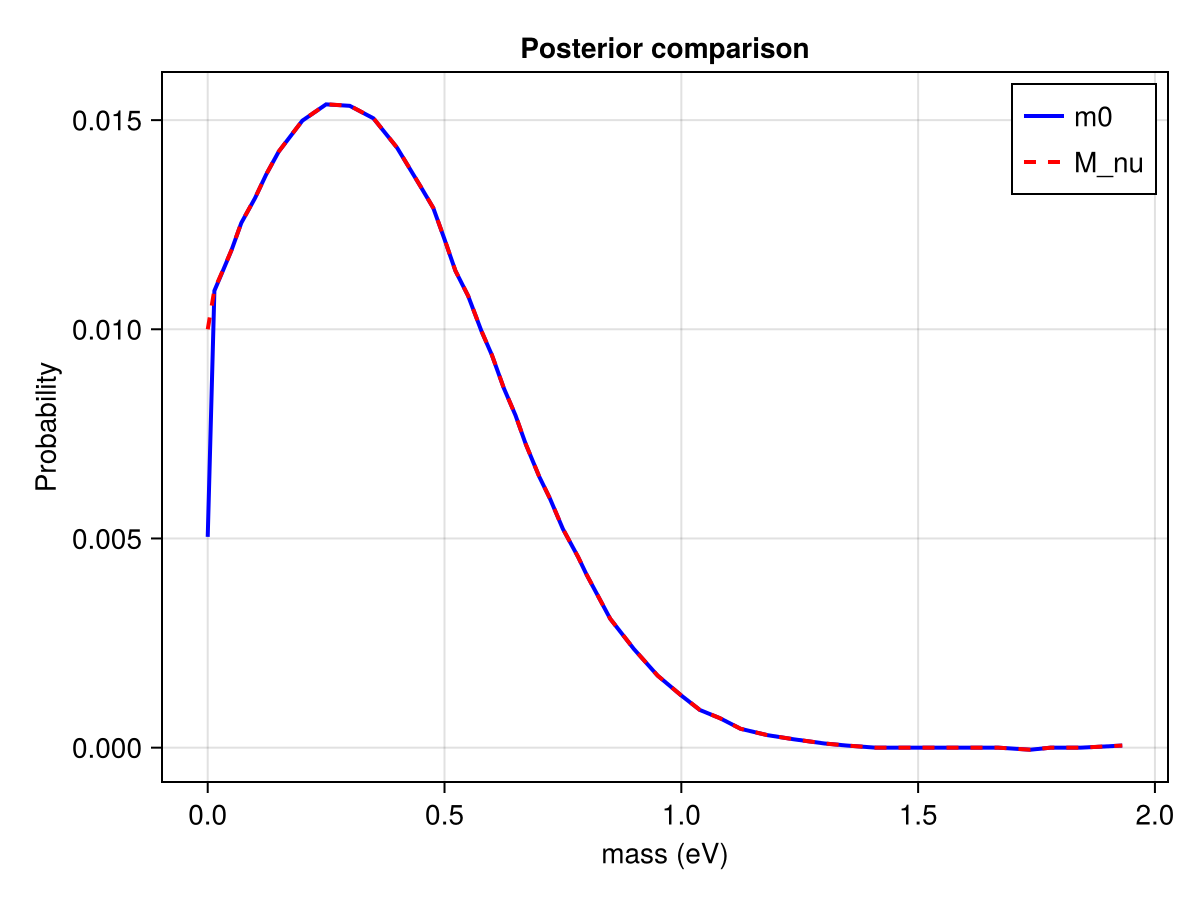

In [41]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="mass (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="m0")
lines!(ax, posterior_data_m_nu[:, 1], posterior_data_m_nu[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="M_nu")

axislegend(ax)
fig

In [42]:
posterior_NN=Newtrinos.katrin.get_posterior_NN(par, osc_cfg.flavour)

┌ Warning: thread = 1 warning: parsed expected 1 columns, but didn't reach end of line around data row: 1. Parsing extra columns and widening final columnset
└ @ CSV ~/.julia/packages/CSV/XLcqT/src/file.jl:593


50×2 Matrix{Float64}:
 0.0          0.202062
 0.0          0.0150448
 0.0          0.00617568
 0.00907081   0.00506415
 0.0300901    0.00816897
 0.0590708    0.0100997
 0.0823974    0.0111982
 0.109071     0.0121522
 0.159071     0.0133695
 0.209071     0.0140637
 0.259071     0.0142585
 0.309071     0.014137
 0.359071     0.0135857
 ⋮           
 1.30823      4.92357e-5
 1.36855      0.0
 1.40304      0.0
 1.44614      0.0
 1.48062      0.0
 1.51511      0.0
 1.57114      0.0
 1.62717      0.0
 1.69611     -4.94074e-5
 1.73924      0.0
 1.8039       0.0
 1.89013      4.94673e-5

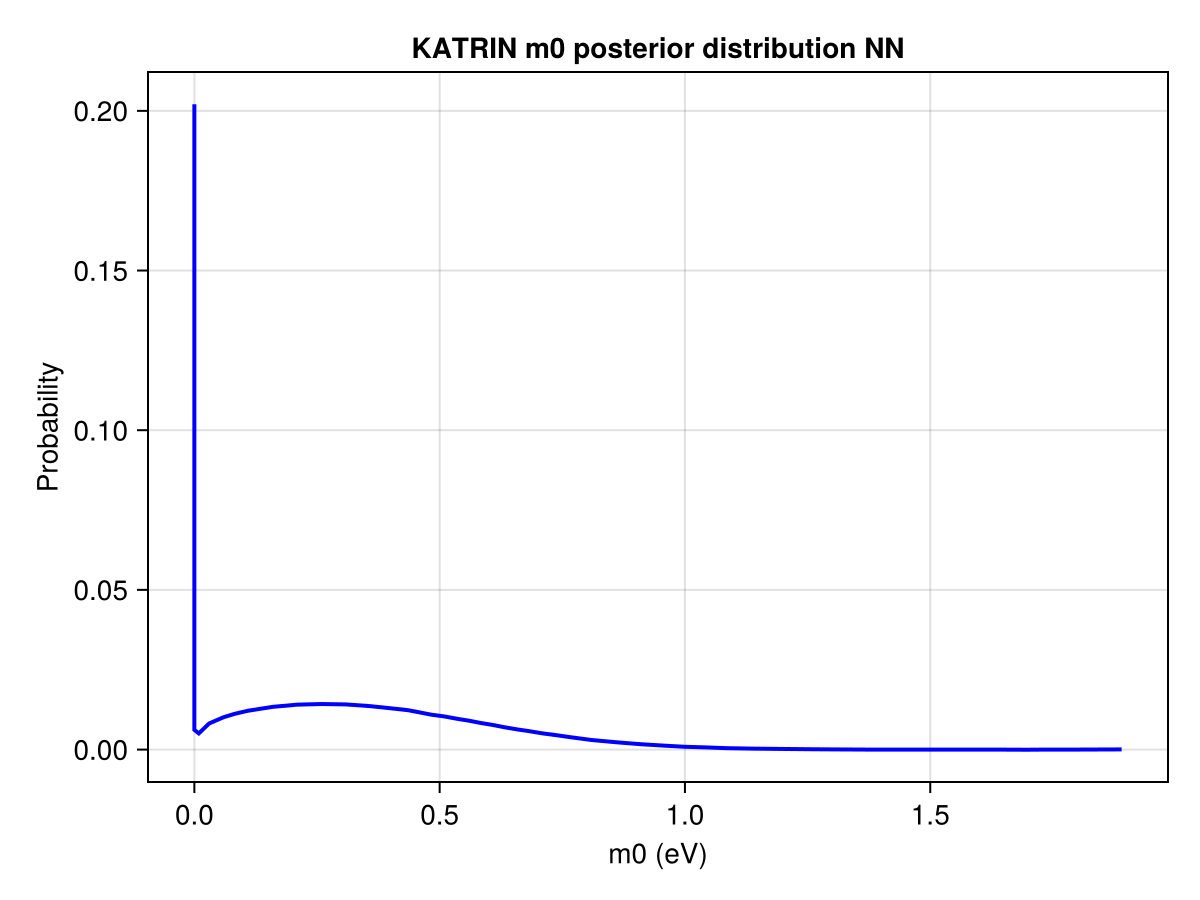

In [43]:
lines(posterior_NN[:, 1], posterior_NN[:, 2],
      axis=(xlabel="m0 (eV)", ylabel="Probability", title="KATRIN m0 posterior distribution NN"),
      color=:blue,
      linewidth=2)

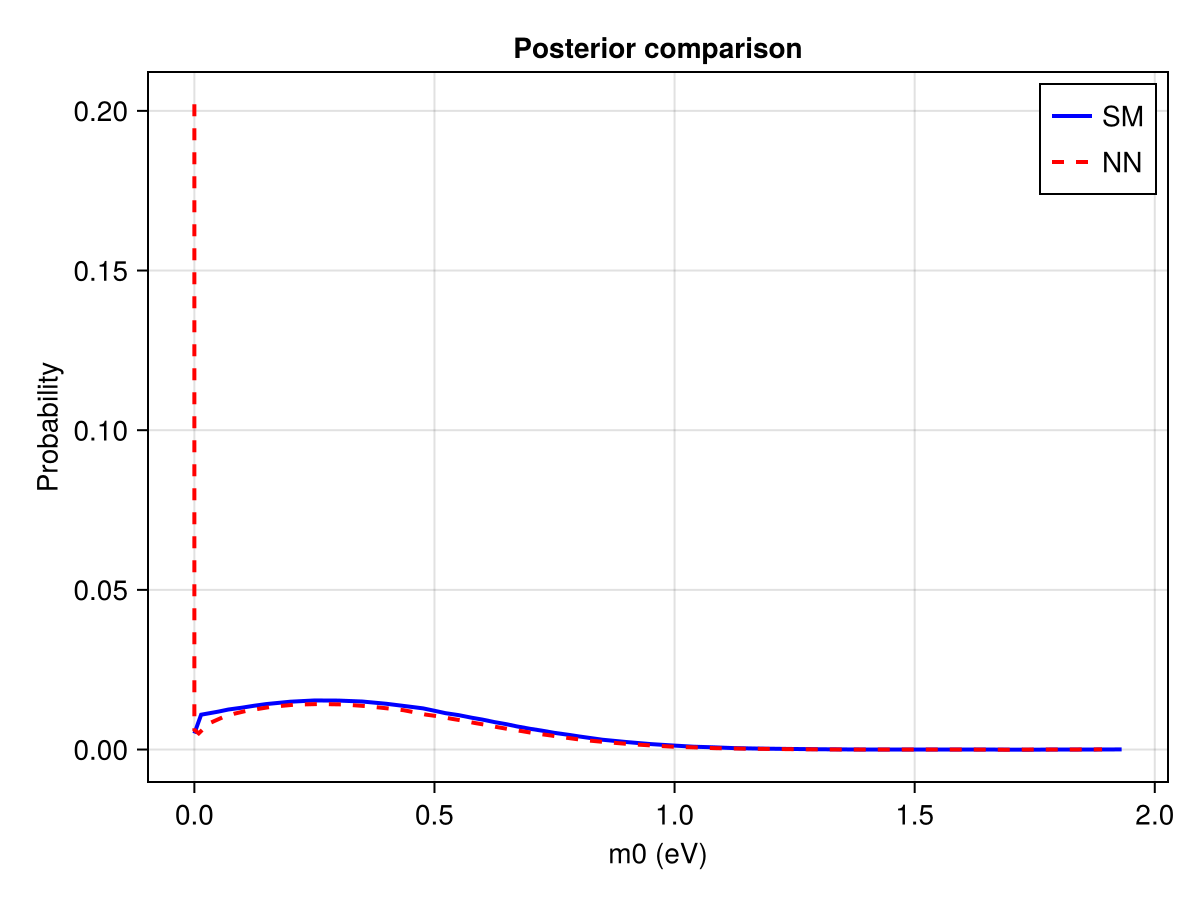

In [44]:

fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN")

axislegend(ax)
fig

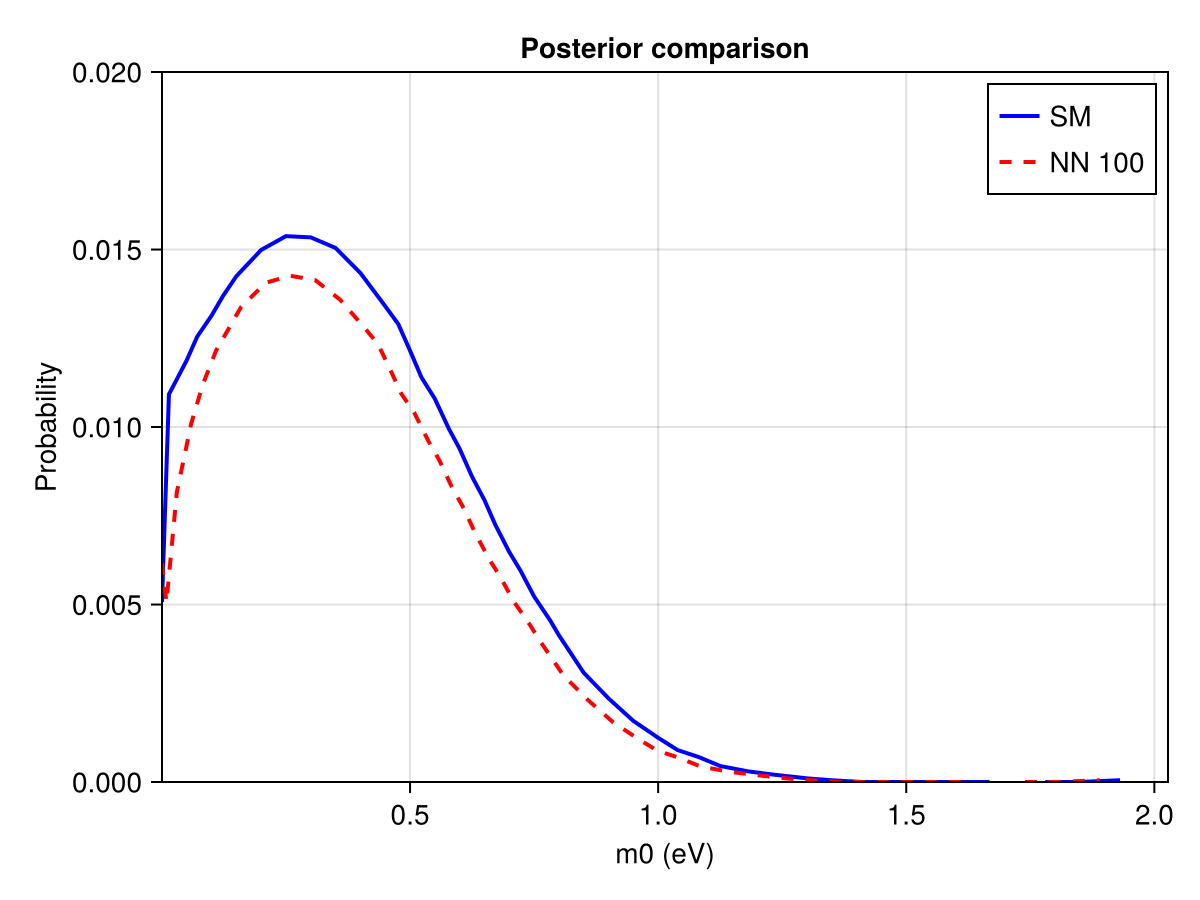

In [45]:
N=round(Int,par[:N])
fig = Figure()
ax = Axis(fig[1, 1], xlabel="m0 (eV)", ylabel="Probability", title="Posterior comparison")

lines!(ax, posterior_sm[:, 1], posterior_sm[:, 2], 
       color=:blue, linewidth=2, label="SM")
lines!(ax, posterior_NN[:, 1], posterior_NN[:, 2], 
       color=:red, linewidth=2, linestyle=:dash, label="NN $N")

xlims!(ax, 0.0001, nothing)
ylims!(ax, 0,0.02)  
axislegend(ax)
fig

Likelihood ratio and r-m0 estimation

In [46]:
likelihood = Newtrinos.generate_likelihood(experiments);

LoadError: type Katrin has no field assets